In [1]:
# Instal dan muat library yang diperlukan
if (!require(caret)) install.packages("caret", dependencies = TRUE)
library(caret)

Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependency ‘subselect’ is not available”
also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘R.methodsS3’, ‘R.oo’, ‘R.utils’, ‘bitops’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘R.cache’, ‘caTools’, ‘TH.data’, ‘profileModel’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘plotrix’, ‘diagram’, ‘lava’, ‘styler’, ‘classInt’, ‘labelled’, ‘gplots’, ‘libcoin’, ‘matrixStats’, ‘multcomp’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘timeDate’, ‘brglm’, ‘gtools’, ‘lme4’, ‘qvcalc’, ‘rex’, ‘Formula’, ‘plotmo’, ‘prodlim’, ‘combinat’, ‘questionr’, ‘ROCR’, ‘mvtnorm’, ‘modeltools’, ‘strucchange’, ‘coin’, ‘zoo’, ‘sandwich’, ‘ROSE’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recip

In [2]:
# Memeriksa apakah file zip sudah ada
if (!file.exists("pima-indians-diabetes-database.zip")) {
  system("kaggle datasets download -d uciml/pima-indians-diabetes-database")
}

# Memeriksa apakah folder sudah ada
if (!dir.exists("pima-indians-diabetes-database")) {
  system("unzip pima-indians-diabetes-database.zip")
}


In [3]:
# system("kaggle datasets download -d uciml/pima-indians-diabetes-database")
# system("unzip pima-indians-diabetes-database.zip")

In [4]:
data <- read.csv("diabetes.csv")
head(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


## Data Understanding

### 1. Collecting Data

In [5]:
## show dimensions of the train and test dataset
dim(data) # 9 variables

## show first few lines of the data dataset
head(data)

# use glimpse() or str() to show data structure
str(data)

# check variable names
names(data)

[1] 768   9

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


'data.frame':	768 obs. of  9 variables:
 $ Pregnancies             : int  6 1 8 1 0 5 3 10 2 8 ...
 $ Glucose                 : int  148 85 183 89 137 116 78 115 197 125 ...
 $ BloodPressure           : int  72 66 64 66 40 74 50 0 70 96 ...
 $ SkinThickness           : int  35 29 0 23 35 0 32 0 45 0 ...
 $ Insulin                 : int  0 0 0 94 168 0 88 0 543 0 ...
 $ BMI                     : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ DiabetesPedigreeFunction: num  0.627 0.351 0.672 0.167 2.288 ...
 $ Age                     : int  50 31 32 21 33 30 26 29 53 54 ...
 $ Outcome                 : int  1 0 1 0 1 0 1 0 1 1 ...


[1] "Pregnancies"              "Glucose"                 
[3] "BloodPressure"            "SkinThickness"           
[5] "Insulin"                  "BMI"                     
[7] "DiabetesPedigreeFunction" "Age"                     
[9] "Outcome"

### 2. Describe Data

In [6]:
summary(data)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

### 3. Validation Data

Loading required package: gridExtra

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘gridExtra’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


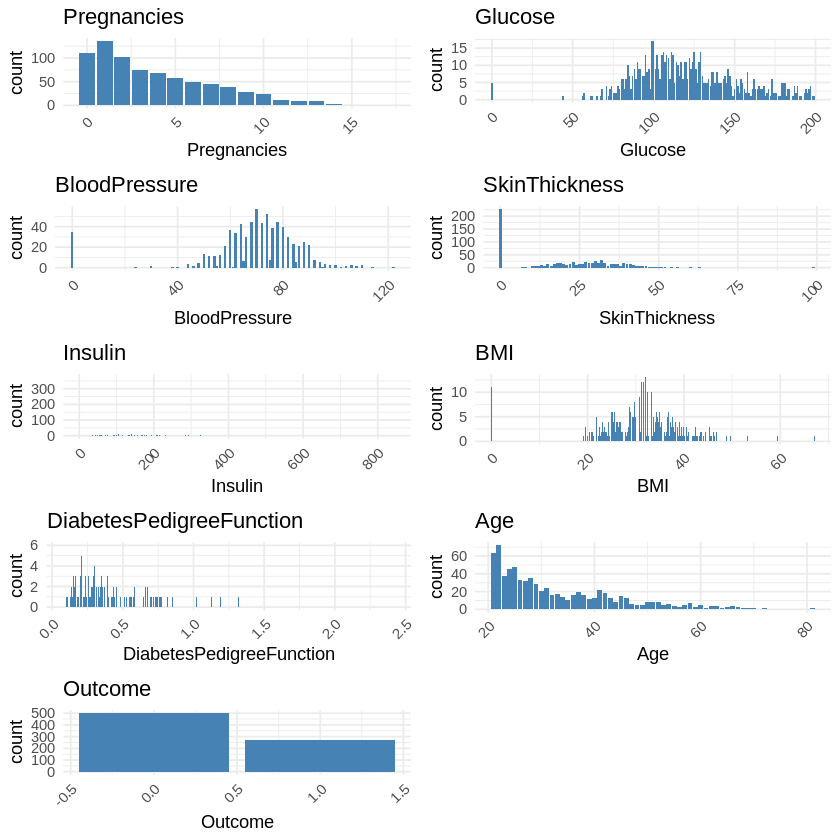

In [7]:
# Instalasi paket jika diperlukan
if (!require(ggplot2)) install.packages("ggplot2")
if (!require(gridExtra)) install.packages("gridExtra")

library(ggplot2)
library(gridExtra)

# Buat daftar plot untuk setiap kolom kategorikal
plot_list <- lapply(names(data), function(col) {
  ggplot(data, aes_string(x = col)) +
    geom_bar(fill = 'steelblue') +  # Membuat count plot (bar plot) serupa dengan sns.countplot
    theme_minimal() +               # Menggunakan tema minimal
    ggtitle(col) +                  # Menambahkan judul berdasarkan nama kolom
    theme(axis.text.x = element_text(angle = 45, hjust = 1))  # Memutar teks sumbu-x jika diperlukan
})

# Tampilkan plot dalam grid
do.call(grid.arrange, c(plot_list, ncol = 2))

Loading required package: reshape2

No id variables; using all as measure variables



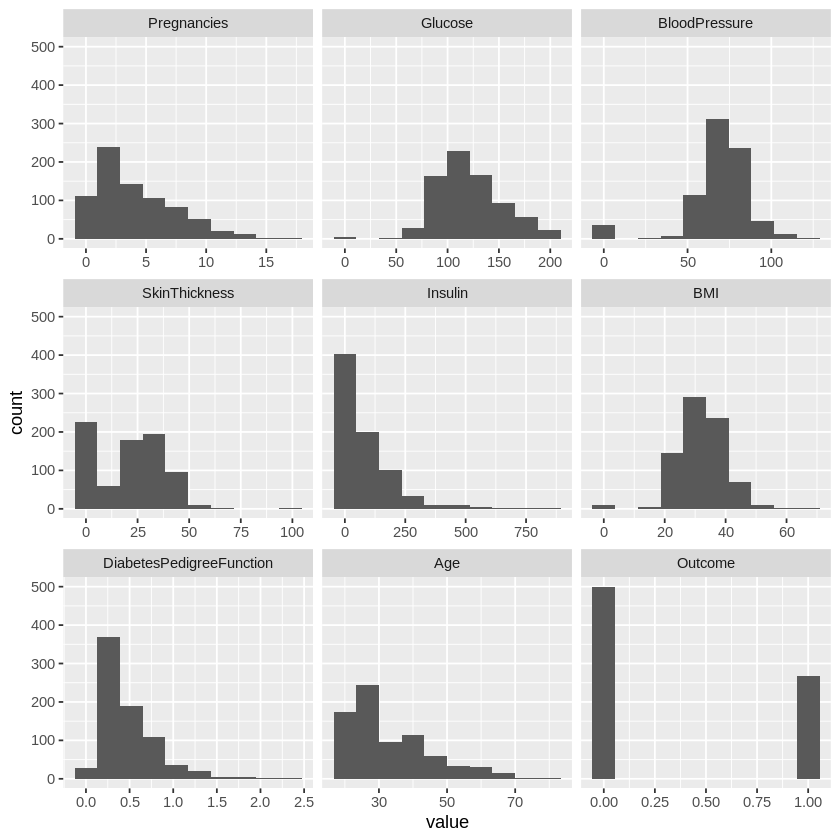

In [8]:
if (!require(reshape2)) install.packages("reshape2")
library(reshape2)

# Membuat histogram menggunakan ggplot2
ggplot(data = melt(data), mapping = aes(x = value)) +
    geom_histogram(bins = 10) +
    facet_wrap(~variable, scales = 'free_x')

## Data Preparation

### 1. Cleaning Data

In [9]:
# Checking Missing Value
sum(is.na(data))

[1] 0

In [10]:
# # Menghapus baris dengan missing values
# data_clean <- na.omit(data)

In [11]:
# Misalkan Anda memiliki dataframe bernama `data`
duplikat <- duplicated(data)

# Menampilkan baris yang duplikat
baris_duplikat <- data[duplikat, ]
print(baris_duplikat)


[1] Pregnancies              Glucose                  BloodPressure           
[4] SkinThickness            Insulin                  BMI                     
[7] DiabetesPedigreeFunction Age                      Outcome                 
<0 rows> (or 0-length row.names)


In [12]:
# Menghitung jumlah baris duplikat
jumlah_duplikat <- sum(duplikat)
print(jumlah_duplikat)

[1] 0


In [13]:
# # Menghapus baris duplikat, hanya menyimpan yang unik
# data_baru <- data[!duplikat, ]

### 2. Data Selection

In [14]:
cor(data)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.00000000,0.12945867,0.14128198,-0.08167177,-0.07353461,0.01768309,-0.03352267,0.54434123,0.22189815
Glucose,0.12945867,1.00000000,0.15258959,0.05732789,0.33135711,0.22107107,0.13733730,0.26351432,0.46658140
BloodPressure,0.14128198,0.15258959,1.00000000,0.20737054,0.08893338,0.28180529,0.04126495,0.23952795,0.06506836
SkinThickness,-0.08167177,0.05732789,0.20737054,1.00000000,0.43678257,0.39257320,0.18392757,-0.11397026,0.07475223
Insulin,-0.07353461,0.33135711,0.08893338,0.43678257,1.00000000,0.19785906,0.18507093,-0.04216295,0.13054795
BMI,0.01768309,0.22107107,0.28180529,0.39257320,0.19785906,1.00000000,0.14064695,0.03624187,0.29269466
DiabetesPedigreeFunction,-0.03352267,0.13733730,0.04126495,0.18392757,0.18507093,0.14064695,1.00000000,0.03356131,0.17384407
Age,0.54434123,0.26351432,0.23952795,-0.11397026,-0.04216295,0.03624187,0.03356131,1.00000000,0.23835598
Outcome,0.22189815,0.46658140,0.06506836,0.07475223,0.13054795,0.29269466,0.17384407,0.23835598,1.00000000


Loading required package: ggcorrplot

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘ggcorrplot’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



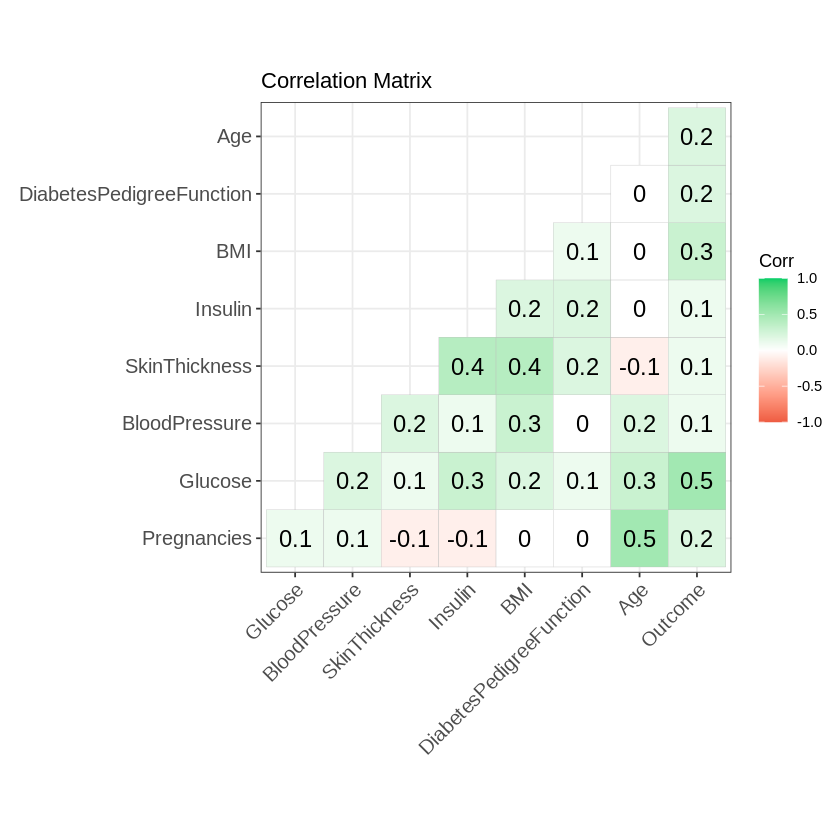

In [15]:
if (!require(ggcorrplot)) install.packages("ggcorrplot")

library(ggcorrplot)
corr <- round(cor(data), 1)

# Plot
ggcorrplot(corr,
           type = "lower",
           lab = TRUE,
           lab_size = 5,
           colors = c("tomato2", "white", "springgreen3"),
           title="Correlation Matrix",
           ggtheme=theme_bw)

In [16]:
# par(mfrow=c(2, 3))  # divide graph area in 2 columns
# boxplot(data$Pregnancies, main="Pregnancies")
# boxplot(data$Glucose, main="Glucose")
# boxplot(data$BloodPressure, main="BloodPressure")
# boxplot(data$Insulin, main="Insulin")
# boxplot(data$BMI, main="BMI")
# boxplot(data$DiabetesPedigreeFunction, main="DiabetesPedigreeFunction")
# boxplot(data$Age, main="Age")
# boxplot(data$Outcome, main="Outcome")

In [17]:
# Menghitung matriks korelasi
korelasi_all <- cor(data)

# Mengambil korelasi dengan kolom 'Outcome'
Korelasistats <- korelasi_all[,'Outcome']

# Mengurutkan korelasi
urutkan <- sort(Korelasistats, decreasing = TRUE)
print(urutkan)

                 Outcome                  Glucose                      BMI 
              1.00000000               0.46658140               0.29269466 
                     Age              Pregnancies DiabetesPedigreeFunction 
              0.23835598               0.22189815               0.17384407 
                 Insulin            SkinThickness            BloodPressure 
              0.13054795               0.07475223               0.06506836 


In [18]:
# # Drop Cols
# drops = c('BloodPressure')
# data_select =  data[ , !(names(data) %in% drops)]

### 3. Data Transformation

In [19]:
# Menormalisasi data menggunakan scale()
scaled_data <- scale(data)

In [20]:
# Menampilkan data yang sudah dinormalisasi
dim(scaled_data)
head(scaled_data)

[1] 768   9

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0.6395305,0.8477713,0.1495433,0.9066791,-0.6924393,0.2038799,0.4681869,1.42506672,1.3650064
-0.8443348,-1.1226647,-0.1604412,0.5305558,-0.6924393,-0.6839762,-0.3648230,-0.19054773,-0.7316434
1.2330766,1.9424580,-0.2637694,-1.2873733,-0.6924393,-1.1025370,0.6040037,-0.10551539,1.3650064
-0.8443348,-0.9975577,-0.1604412,0.1544326,0.1232213,-0.4937213,-0.9201630,-1.04087112,-0.7316434
-1.1411079,0.5037269,-1.5037073,0.9066791,0.7653372,1.4088275,5.4813370,-0.02048305,1.3650064
0.3427574,-0.1530851,0.2528715,-1.2873733,-0.6924393,-0.8108128,-0.8175458,-0.27558007,-0.7316434


## Modelling & Evaluation

### 1. Split Data

In [21]:
# Install dan muat paket dplyr
if (!require(dplyr)) install.packages("dplyr")
library(dplyr)

# Split data menjadi training (80%) dan testing (20%)
set.seed(123)
train_data <- sample_frac(data, 0.8)
test_data <- anti_join(data, train_data)

# Pisahkan fitur dan target untuk training dan testing
X_train <- train_data %>% select(-Outcome)
Y_train <- train_data$Outcome
X_test <- test_data %>% select(-Outcome)
Y_test <- test_data$Outcome

Loading required package: dplyr


Attaching package: ‘dplyr’


The following object is masked from ‘package:gridExtra’:

    combine


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Joining with `by = join_by(Pregnancies, Glucose, BloodPressure, SkinThickness,
Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome)`


### 2. Build Model & Evaluation

In [22]:
# Instal dan muat library yang diperlukan
if (!require(e1071)) install.packages("e1071")
library(e1071)

# Membangun model Naive Bayes
set.seed(123)
nb_model <- naiveBayes(Outcome ~ ., data = train_data)

# Membuat prediksi pada dataset test
pred_nb <- predict(nb_model, newdata = X_test)

# Menyelaraskan level faktor
levels <- union(levels(factor(Y_test)), levels(factor(pred_nb)))

Y_test <- factor(Y_test, levels = levels)
pred_nb <- factor(pred_nb, levels = levels)

# Evaluasi kinerja model menggunakan Confusion Matrix
confusionMatrix(pred_nb, Y_test)

Loading required package: e1071



Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 86 21
         1 16 31
                                          
               Accuracy : 0.7597          
                 95% CI : (0.6844, 0.8248)
    No Information Rate : 0.6623          
    P-Value [Acc > NIR] : 0.005717        
                                          
                  Kappa : 0.4499          
                                          
 Mcnemar's Test P-Value : 0.510798        
                                          
            Sensitivity : 0.8431          
            Specificity : 0.5962          
         Pos Pred Value : 0.8037          
         Neg Pred Value : 0.6596          
             Prevalence : 0.6623          
         Detection Rate : 0.5584          
   Detection Prevalence : 0.6948          
      Balanced Accuracy : 0.7196          
                                          
       'Positive' Class : 0               
                                    